### Homework 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.linear_model import Ridge
from sklearn import metrics




### Reading data

In [2]:
data_url='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
data=pd.read_csv(data_url)

In [3]:
data.head( )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Data preparation

**Select only the features from above and fill in the missing values with 0**

In [5]:
data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

we have one cloumn with 207 missing values

In [6]:
data['total_bedrooms'].fillna(0,inplace=True)

**Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.**

In [7]:
data['rooms_per_household ']=data['total_rooms']/data['households']


**Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe**

In [8]:
data['bedrooms_per_room']=data['total_bedrooms']/data['total_rooms']

**Create a new column population_per_household by dividing the column population by the column households from dataframe**

In [9]:
data['population_per_household']=data['population']/data['households']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


**Question 1**


**What is the most frequent observation (mode) for the column ocean_proximity?**

In [10]:
data.ocean_proximity.mode()

0    <1H OCEAN
dtype: object

Answer:<1H OCEAN

**Split the data**


Split your data in train/val/test sets, with 60%/20%/20% distribution.    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42. Make sure that the target value (median_house_value) is not in your dataframe.

In [13]:
data_train_full,data_test=train_test_split(data,test_size=0.20,random_state=42)
data_train,data_val=train_test_split(data_train_full,test_size=0.25,random_state=42)

In [14]:
data_train=data_train.reset_index(drop=True)
data_val=data_val.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)

In [15]:
y_train=data_train.median_house_value.values
y_val=data_val.median_house_value.values
y_test=data_test.median_house_value.values


In [16]:
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

**Question 2**

Create the correlation matrix for the numerical features of your train dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.What are the two features that have the biggest correlation in this dataset?


In [17]:
data.corr().unstack().sort_values(ascending=False).drop_duplicates()

population_per_household  population_per_household    1.000000
households                total_bedrooms              0.966507
total_bedrooms            total_rooms                 0.920196
households                total_rooms                 0.918484
                          population                  0.907222
                                                        ...   
housing_median_age        total_bedrooms             -0.317063
total_rooms               housing_median_age         -0.361262
rooms_per_household       bedrooms_per_room          -0.387465
bedrooms_per_room         median_income              -0.573836
latitude                  longitude                  -0.924664
Length: 67, dtype: float64

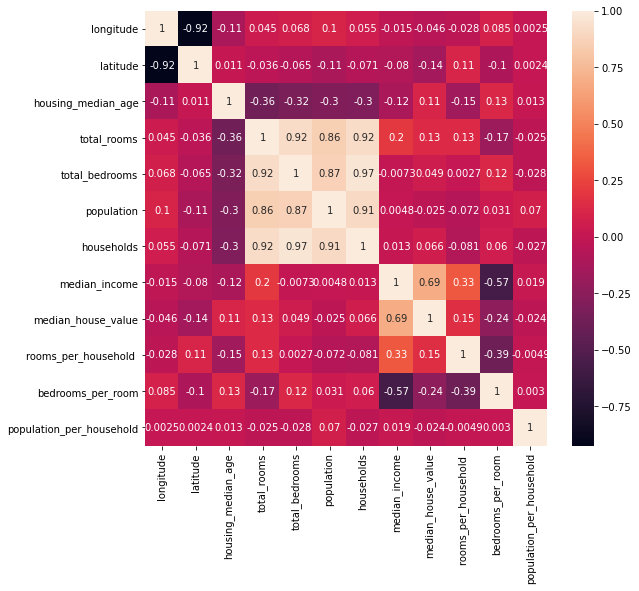

In [18]:

plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),annot=True);

**Make median_house_value binary**

    We need to turn the median_house_value variable from numeric into binary.
    Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise 

In [19]:
y_train_mean=y_train.mean()
y_train_binary=(y_train>y_train_mean).astype(int)
y_val_mean=y_val.mean()
y_val_binary=(y_val>y_val_mean).astype(int)
y_test_mean=y_test.mean()
y_test_binary=(y_test>y_test_mean).astype(int)

**Question 3**

Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only. What is the value of mutual information? Round it to 2 decimal digits using round(score, 2)


In [20]:
data.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [21]:
print(data.columns)
categorical=['ocean_proximity']
numerical=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'rooms_per_household ',
       'bedrooms_per_room', 'population_per_household']

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household ',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')


**Feauter importance**

In [22]:
score=mutual_info_score(data_train.ocean_proximity,y_train_binary)


In [23]:
score.round(2)

0.1

**Question 4**

Now let's train a logistic regression.Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.Fit the model on the training dataset. To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters: model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42). Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [24]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [25]:
train_dict=data_train[categorical+numerical].to_dict(orient='records')

In [26]:
train_dict

[{'ocean_proximity': '<1H OCEAN',
  'longitude': -119.67,
  'latitude': 34.43,
  'housing_median_age': 39.0,
  'total_rooms': 1467.0,
  'total_bedrooms': 381.0,
  'population': 1404.0,
  'households': 374.0,
  'median_income': 2.3681,
  'rooms_per_household ': 3.9224598930481283,
  'bedrooms_per_room': 0.25971370143149286,
  'population_per_household': 3.7540106951871657},
 {'ocean_proximity': 'NEAR OCEAN',
  'longitude': -118.32,
  'latitude': 33.74,
  'housing_median_age': 24.0,
  'total_rooms': 6097.0,
  'total_bedrooms': 794.0,
  'population': 2248.0,
  'households': 806.0,
  'median_income': 10.1357,
  'rooms_per_household ': 7.564516129032258,
  'bedrooms_per_room': 0.13022798097424962,
  'population_per_household': 2.7890818858560795},
 {'ocean_proximity': 'INLAND',
  'longitude': -121.62,
  'latitude': 39.13,
  'housing_median_age': 41.0,
  'total_rooms': 1317.0,
  'total_bedrooms': 309.0,
  'population': 856.0,
  'households': 337.0,
  'median_income': 1.6719,
  'rooms_per_hou

In [27]:
dv=DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train=dv.transform(train_dict)

In [28]:
dv.get_feature_names()

['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household ',
 'total_bedrooms',
 'total_rooms']

**Logistic regression**

In [29]:
model=LogisticRegression( solver='liblinear',C=1.0, max_iter=1000, random_state=4)
model.fit(X_train,y_train_binary)

LogisticRegression(max_iter=1000, random_state=4, solver='liblinear')

In [31]:
val_dict=data_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dict)

In [32]:
model.coef_ # the weights

array([[ 1.01994743e-01,  3.94675025e-03,  3.62816938e-02,
         8.31503606e-02,  7.68562157e-02,  1.21023811e+00,
         4.36203272e-01, -1.47664070e+00,  1.07736084e-02,
         2.89757436e-01,  6.83189524e-01, -1.63570278e-03,
         1.03128026e-02, -2.86071114e-02,  1.94658271e-03,
        -1.63443685e-04]])

In [33]:
model.intercept_  # b0

array([-0.05671686])

In [34]:
model.predict_proba(X_val)

array([[0.90584559, 0.09415441],
       [0.86187002, 0.13812998],
       [0.04631196, 0.95368804],
       ...,
       [0.04186644, 0.95813356],
       [0.14915944, 0.85084056],
       [0.53961251, 0.46038749]])

In [35]:
y_pred = model.predict_proba(X_val)[:, 1]

In [36]:
y_pred

array([0.09415441, 0.13812998, 0.95368804, ..., 0.95813356, 0.85084056,
       0.46038749])

In [37]:
y_pred=model.predict(X_val)

In [38]:
print(classification_report(y_val_binary,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2458
           1       0.80      0.79      0.80      1670

    accuracy                           0.84      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.84      0.84      0.84      4128



**Question 5**

 Let's find the least useful feature using the feature elimination technique. Train a model with all these features (using the same parameters as in Q4).  Now exclude each feature from this set and train a model without it. Record the accuracy for each model. For each feature, calculate the difference between the original accuracy and the accuracy without the feature. Which of following feature has the smallest difference?
        total_rooms
        total_bedrooms
        population
        households

    note: the difference doesn't have to be positive


In [57]:
feature_list=['total_rooms'  ,'total_bedrooms','population','households']
for val in feature_list:
    data_train_feature=data_train.copy()
    del data_train_feature[val]
    data_train_dic_fe=data_train_feature.to_dict(orient='records')
    X_train_feature=dv.fit_transform(data_train_dic_fe)
    model_new=LogisticRegression(solver='liblinear',C=1.0,max_iter=1000,random_state=42)
    model_new.fit(X_train_feature,y_train_binary)
    data_val_feature=data_val.copy()
    del data_val_feature[val]
    data_val_dic_fe=data_val_feature.to_dict(orient='records')
    X_val_feature=dv.fit_transform(data_val_dic_fe)
    y_pred_feature=model_new.predict(X_val_feature)
    print(classification_report(y_val_binary,y_pred_feature))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2458
           1       0.80      0.80      0.80      1670

    accuracy                           0.84      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.84      0.84      0.84      4128

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2458
           1       0.80      0.80      0.80      1670

    accuracy                           0.84      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.84      0.84      0.84      4128

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2458
           1       0.79      0.78      0.79      1670

    accuracy                           0.83      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.83      0.83      0.83      4128

              preci

**Question 6**

or this question, we'll see how to use a linear regression model from Scikit-Learn   We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column. Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.  This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.


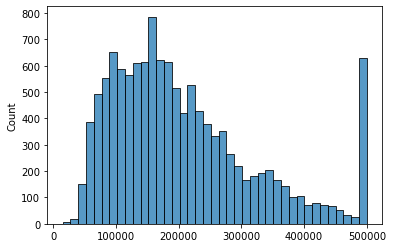

In [41]:
sns.histplot(y_train);


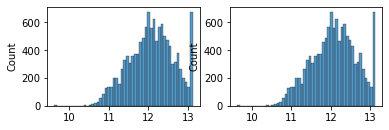

In [44]:
y_train_log=np.log1p(y_train)
y_val_log=np.log1p(y_val)
plt.subplot(2,2,1)
sns.histplot(y_train_log);
plt.subplot(2,2,2)
sns.histplot(y_train_log);


In [48]:
alpha=[0, 0.01, 0.1, 1, 10]


for i in range(0,len(alpha)+1):
    lm=Ridge(alpha=i,solver='sag',random_state=42)
    lm.fit(X_train,y_train_log)
    predictions = lm.predict(X_val)
    print('MAE:', metrics.mean_absolute_error(y_val_log, predictions))


MAE: 0.4238615670032676
MAE: 0.42386156882713294
MAE: 0.423861570650995
MAE: 0.42386157247055817
MAE: 0.42386157429441995
MAE: 0.4238615761182828
